<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Demograficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Visualização de Dados Demográficos com Seaborn

Neste capítulo, aplicaremos os conhecimentos adquiridos para utilizar o Seaborn na visualização de dados demográficos, com foco em tábuas de mortalidade, expectativa de vida, mortalidade infantil e pirâmides. Esses tipos de dados são fundamentais para compreender a dinâmica populacional e para o planejamento de políticas públicas.

## 6.1 Introdução aos Dados Demográficos  

Dados demográficos são estatísticas que descrevem características de uma população, como idade, sexo, mortalidade, fecundidade, migração, entre outros. Neste capítulo, focaremos em aspectos importantes:  
  
1. **Tábuas de Mortalidade**:  são ferramentas estatísticas utilizadas para descrever e analisar os padrões de mortalidade, ou seja, números de óbitos de uma população ao longo de um determinado período de tempo. Elas são calculadas a partir de um número de 100 mil pessoas e apresentam indicadores de expectativa de vida, probabilidades de mortes e número de sobreviventes para cada faixa etária  
2. **Expectativa de Vida**: Estimativa do número médio de anos que uma pessoa viverá  
3. **Mortalidade Infantil**: Taxas para menores de um ano  
4. **População**: Pirâmides etárias para compreender a estrutura da população
  
Vamos começar importando as bibliotecas necessárias e configurando o ambiente:

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

## 6.2 Dados de Tábuas de Mortalidade

As tábuas de mortalidade são ferramentas fundamentais em demografia, atuária e outras áreas. Elas demonstram a probabilidade de morte em cada idade e são usadas para calcular a expectativa de vida e para precificar seguros de vida e planos de previdência.

Utilizaremos as tábuas de mortalidade disponibilizadas pelo IBGE. Projeções da População, edição 2024. Tábuas de mortalidade para o período 2000–2070. Disponível em: https://ftp.ibge.gov.br/Projecao_da_Populacao/Projecao_da_Populacao_2024/projecoes_2024_tab5_tabuas_mortalidade.xlsx.

In [2]:
# Carregar Tábuas do Github em formato Parquet
tabua_mas = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_homens.parquet")
tabua_fem = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_mulheres.parquet")

# Visualizar as 20 primeiras linhas da tábua masculina
print("Tábuas de Mortalidade - Homens")
tabua_mas.head(20)

Tábuas de Mortalidade - Homens


,Ano,Grupo Etário,nMx,nqx,nAx,lx,ndx,nLx,Tx,ex,Local
0,2000,0,0.032572,0.031678,0.133575,100000.000000,3167.836304,97255.308361,6.731573e+06,67.315733,Brasil
1,2000,1-4,0.001249,0.004983,1.557550,96832.163696,482.492585,386150.190896,6.634318e+06,68.513578,Brasil
2,2000,5-9,0.000443,0.002211,2.313050,96349.671112,213.068062,481175.852431,6.248168e+06,64.848875,Brasil
3,2000,10-14,0.000535,0.002672,2.807357,96136.603050,256.849868,480119.835306,5.766992e+06,59.987473,Brasil
4,2000,15-19,0.001947,0.009692,2.856376,95879.753181,929.282967,477406.732610,5.286872e+06,55.140652,Brasil
5,2000,20-24,0.003018,0.014980,2.600570,94950.470215,1422.404906,471339.389459,4.809465e+06,50.652360,Brasil
6,2000,25-29,0.003251,0.016126,2.535952,93528.065309,1508.207527,463924.031337,4.338126e+06,46.383147,Brasil
7,2000,30-34,0.003705,0.018358,2.558702,92019.857782,1689.259671,455975.302341,3.874202e+06,42.101803,Brasil
8,2000,35-39,0.004472,0.022119,2.582464,90330.598111,1998.063773,446822.600221,3.418227e+06,37.841293,Brasil
9,2000,40-44,0.005755,0.028386,2.602459,88332.534338,2507.383188,435651.116613,2.971404e+06,33.638840,Brasil


In [3]:
# Visualizar as 20 primeiras linhas da tábua feminina
print("Tábua de Mortalidade - Mulheres")
tabua_fem.head(20)

Tábua de Mortalidade - Mulheres


,Ano,Grupo Etário,nMx,nqx,nAx,lx,ndx,nLx,Tx,ex,Local
0,2000,0,0.024971,0.024436,0.123308,100000.000000,2443.606753,97857.710004,7.507655e+06,75.076554,Brasil
1,2000,1-4,0.001049,0.004185,1.484223,97556.393247,408.240564,389198.530691,7.409798e+06,75.953993,Brasil
2,2000,5-9,0.000310,0.001548,2.250412,97148.152683,150.379710,485327.281146,7.020599e+06,72.266934,Brasil
3,2000,10-14,0.000337,0.001684,2.633627,96997.772973,163.353610,484602.309253,6.535272e+06,67.375483,Brasil
4,2000,15-19,0.000590,0.002948,2.662049,96834.419362,285.482396,483504.653053,6.050670e+06,62.484699,Brasil
5,2000,20-24,0.000738,0.003684,2.593931,96548.936967,355.684265,481888.883943,5.567165e+06,57.661586,Brasil
6,2000,25-29,0.000934,0.004658,2.612628,96193.252702,448.065653,479896.564096,5.085276e+06,52.865205,Brasil
7,2000,30-34,0.001279,0.006377,2.634695,95745.187049,610.566862,477281.758292,4.605379e+06,48.100375,Brasil
8,2000,35-39,0.001805,0.008988,2.651480,95134.620187,855.081803,473664.924060,4.128098e+06,43.392171,Brasil
9,2000,40-44,0.002695,0.013391,2.659413,94279.538384,1262.501249,468442.697466,3.654433e+06,38.761674,Brasil


Variáveis da tábua de mortalidade:

1. **Ano**: Período de referência dos dados.

2. **Grupo Etário**: Faixa de idade analisada (ex.: 0-1, 1-4, ..., 85+).

3. **nMx**: Taxa central de mortalidade do grupo etário.

4. **nqx**: Probabilidade de morte entre as idades *x* e *x+n*.

5. **nAx**: Fração do intervalo *n* vivido por quem morre nele.

6. **lx**: Número de sobreviventes na idade exata *x*.

7. **ndx**: Número de mortes entre as idades *x* e *x+n*.

8. **nLx**: Pessoas-anos vividos no intervalo *x* a *x+n*.

9. **Tx**: Pessoas-anos totais vividos acima da idade *x*.

10. **ex**: Expectativa de vida média aos *x* anos.

11. **Local**: Área geográfica referente aos dados.

## 6.3 Visualização da Probabilidade de Morte $(q_x)$

Vamos visualizar como a probabilidade de morte varia por grupo etário:

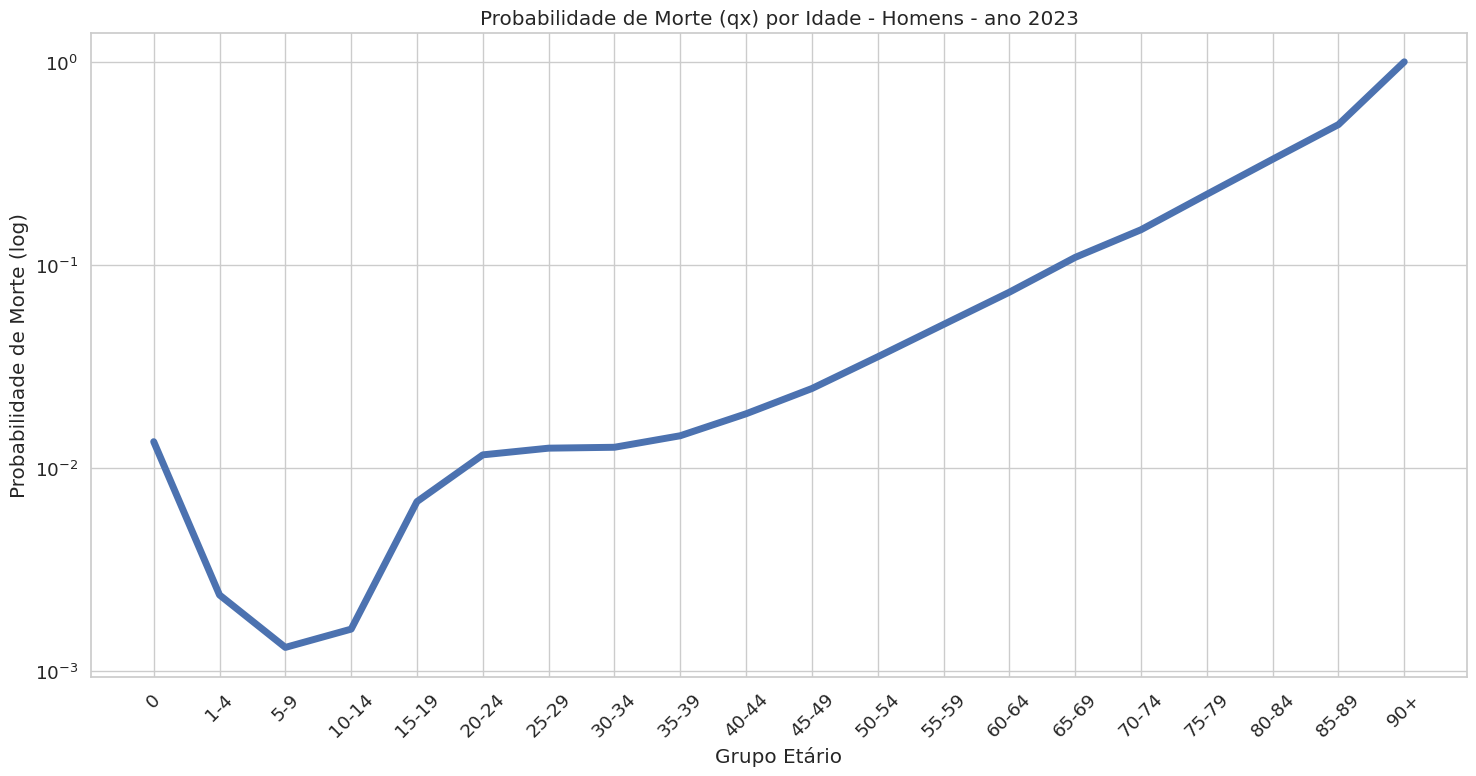

In [4]:
# Filtrar apenas o ano de 2023 para a tábua de mortalidade masculina
tabua_mas_2023 = tabua_mas[tabua_mas['Ano'] == 2023]

# Filtrar apenas o Local Brasil
tabua_mas_2023_br = tabua_mas_2023[tabua_mas_2023['Local'] == 'Brasil']

# Gerar o gráfico
plt.figure(figsize=(15, 8))
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_mas_2023_br, linewidth=5)
plt.title('Probabilidade de Morte (qx) por Idade - Homens - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Probabilidade de Morte (log)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus
plt.grid(True, which="major", ls="-")
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## 6.4 Comparação de Tábuas de Mortalidade por Sexo

Na prática, as tábuas de mortalidade são diferentes para homens e mulheres. Vamos observar a diferença do comportamento da taxa de mortalidade (nMx):

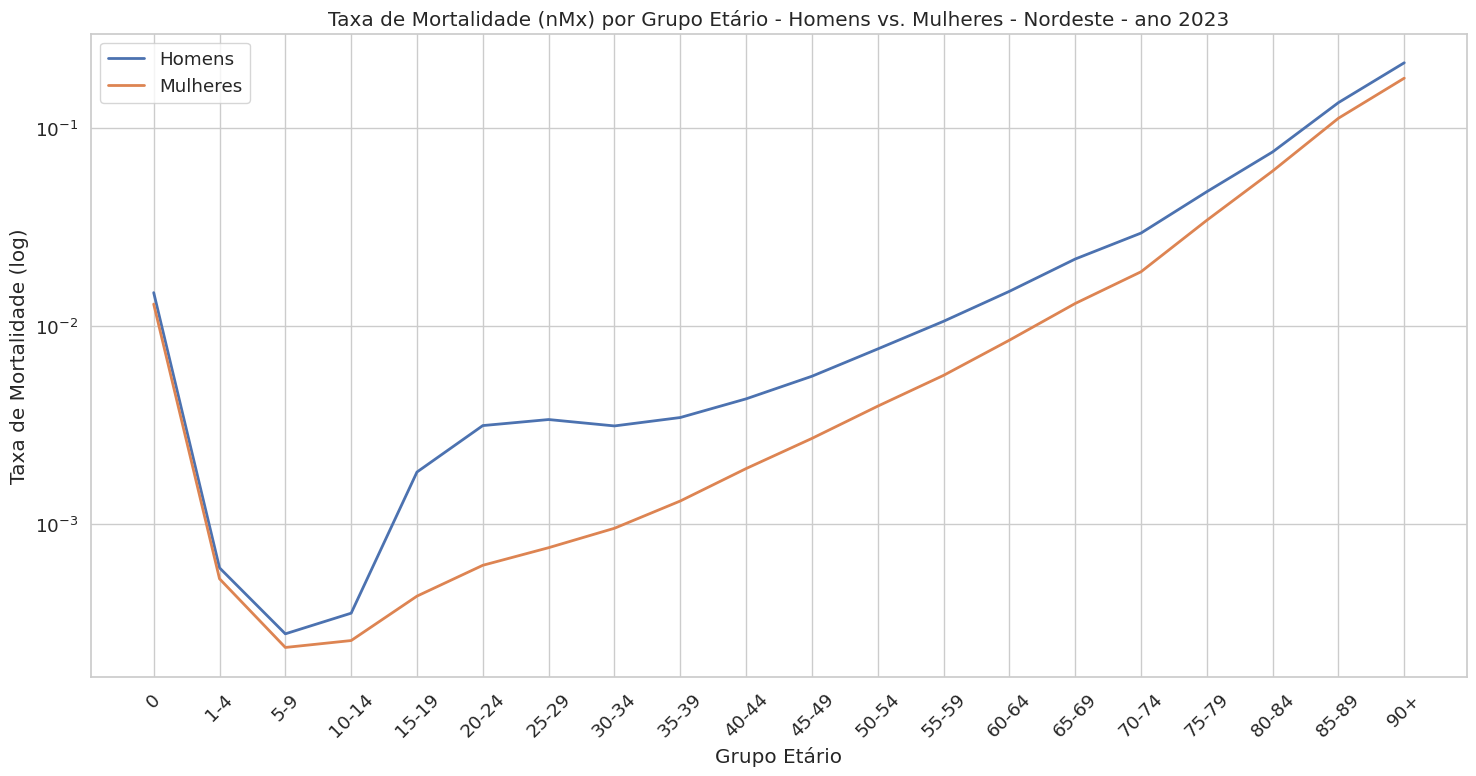

In [5]:
# Filtrar apenas o ano de 2023 para ambas as tábuas
tabua_mas_2023 = tabua_mas[tabua_mas['Ano'] == 2023]
tabua_fem_2023 = tabua_fem[tabua_fem['Ano'] == 2023]

# Filtrar apenas o Local Nordeste para asmbas as tábuas
tabua_mas_2023_ne = tabua_mas_2023[tabua_mas_2023['Local'] == 'Nordeste']
tabua_fem_2023_ne = tabua_fem_2023[tabua_fem_2023['Local'] == 'Nordeste']

# Gerar um gráfico com as duas linhas de taxa de mortalidade por grupo etário
plt.figure(figsize=(15, 8))
sns.lineplot(x='Grupo Etário', y='nMx', data=tabua_mas_2023_ne, linewidth=2, label='Homens')
sns.lineplot(x='Grupo Etário', y='nMx', data=tabua_fem_2023_ne, linewidth=2, label='Mulheres')
plt.title('Taxa de Mortalidade (nMx) por Grupo Etário - Homens vs. Mulheres - Nordeste - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Taxa de Mortalidade (log)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which="major", ls="-")
plt.legend()
plt.tight_layout()
plt.show()

## 6.5 Observar o Comportamento da Probabilidade de Morte

Com dados históricos das tábuas de mortalidade, podemos observar a evolução do comportamento da probabilidade de morte (qx) com o passar dos anos.

In [6]:
# Função para gerar o gráfico
def plot_qx_evolution(data, title):
    # Configura o tamanho da figura do gráfico
    plt.figure(figsize=(15, 8))

    # Obtém os anos únicos do DataFrame e os ordena
    anos = sorted(data['Ano'].unique())
    # Gera uma paleta de cores gradiente (viridis) baseada no número de anos
    colors = plt.cm.viridis(np.linspace(0, 1, len(anos)))

    # Itera sobre cada ano e sua cor correspondente
    for ano, color in zip(anos, colors):
        # Filtra os dados apenas para o ano atual
        dados_ano = data[data['Ano'] == ano]
        # Plota a linha da probabilidade de morte (nqx) por grupo etário
        sns.lineplot(x='Grupo Etário', y='nqx', data=dados_ano,
                     color=color, label='_nolegend_', linewidth=1.5)  # '_nolegend_' evita que cada linha apareça na legenda

    # Configura título e rótulos dos eixos
    plt.title(title)
    plt.xlabel('Grupo Etário')
    plt.ylabel('Probabilidade de Morte (qx)')
    # Define escala logarítmica no eixo y para melhor visualização
    plt.yscale('log')
    # Rotaciona as legendas do eixo x em 45º
    plt.xticks(rotation=45)
    # Adiciona grid no gráfico
    plt.grid(True, which="major", ls="-")

    # Normaliza os anos para mapear cores (usado na barra de cores)
    norm = mcolors.Normalize(vmin=min(anos), vmax=max(anos))
    # Cria um mapeamento de cores (viridis) baseado na normalização
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])  # Define um array vazio (necessário para a barra de cores)

    # Ajusta o layout para evitar sobreposições (reserva espaço abaixo para a barra de cores)
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # rect=[left, bottom, right, top]

    # Cria um eixo adicional para a barra de cores horizontal
    cbar_ax = plt.gcf().add_axes([0.15, 0.05, 0.7, 0.03])  # [left, bottom, width, height]
    # Adiciona a barra de cores no eixo criado
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Ano')  # Rótulo da barra de cores

    # Exibe o gráfico
    plt.show()

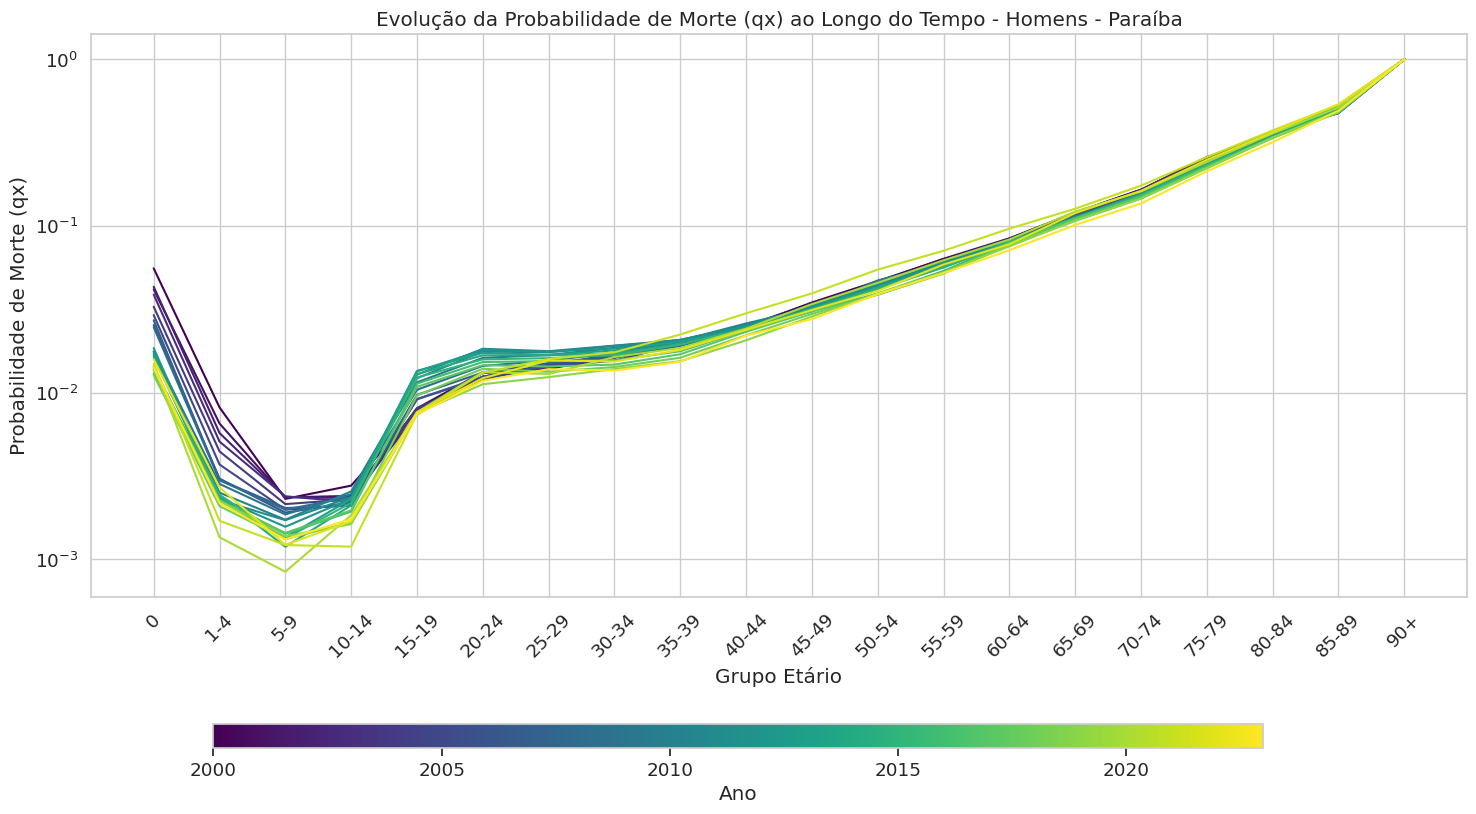

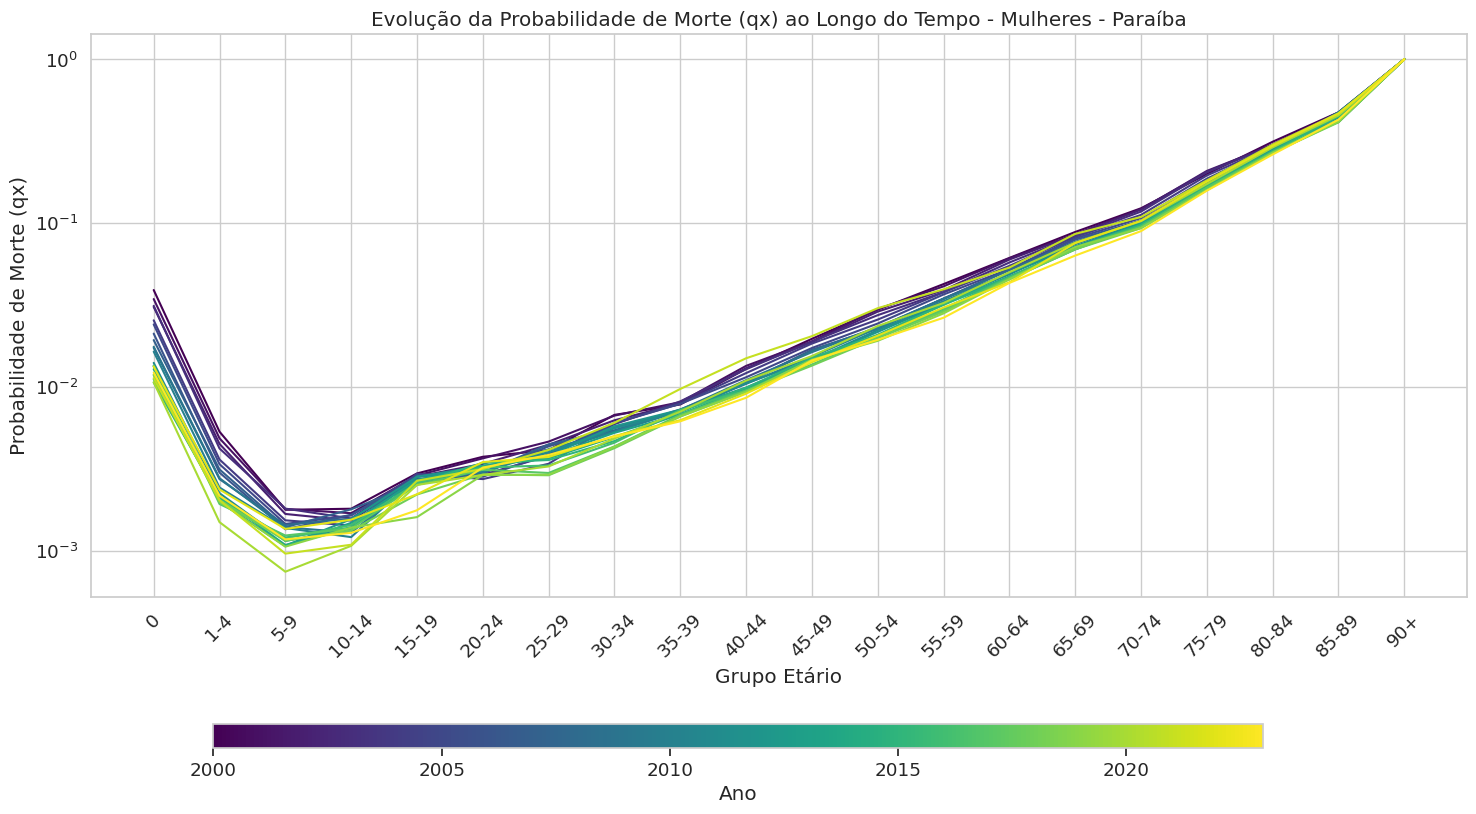

In [7]:
# Filtrar apenas o Local Paraíba para ambas as tábuas
tabua_mas_pb = tabua_mas[tabua_mas['Local'] == 'Paraíba']
tabua_fem_pb = tabua_fem[tabua_fem['Local'] == 'Paraíba']

# Gerar os gráficos
plot_qx_evolution(tabua_mas_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Homens - Paraíba')
plot_qx_evolution(tabua_fem_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Mulheres - Paraíba')

## 6.6 Expectativa de Vida

A expectativa de vida é uma medida estatística que indica o número médio de anos a ser vivido a partir de uma determinada idade. Vamos visualizar a expectativa de vida em diferentes faixas etárias:

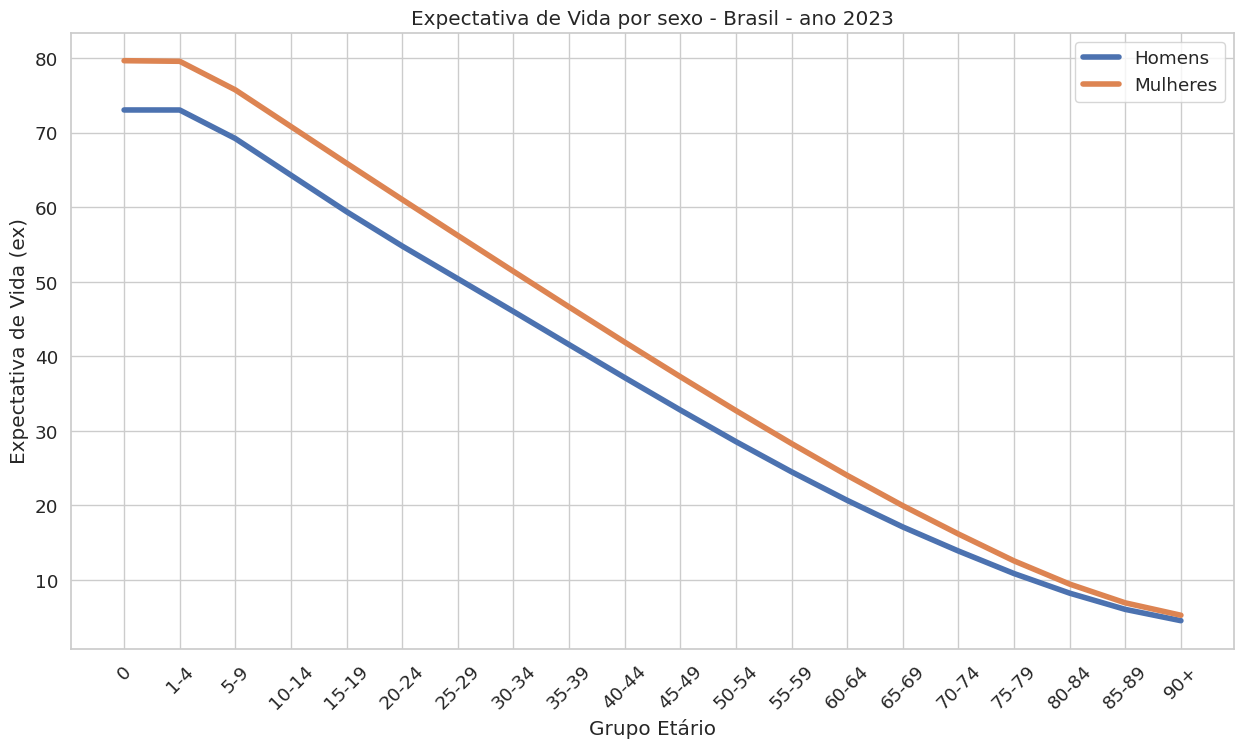

In [8]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Gráfico da Expectativa de Vida para os dois sexos no ano de 2023
plt.figure(figsize=(15, 8))
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_mas_br[tabua_mas_br['Ano'] == 2023], linewidth=4, label='Homens')
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_fem_br[tabua_fem_br['Ano'] == 2023], linewidth=4, label='Mulheres')
plt.title('Expectativa de Vida por sexo - Brasil - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Expectativa de Vida (ex)')
plt.xticks(rotation=45)
plt.grid(True, which="major", ls="-")
plt.show()

## 6.7 Comportamento da Expectativa de Vida ao Longo do Tempo

A expectativa de vida tem aumentado ao longo do tempo devido a melhorias na saúde pública, nutrição, medicina, entre outros fatores. Vamos visualizar essa evolução:

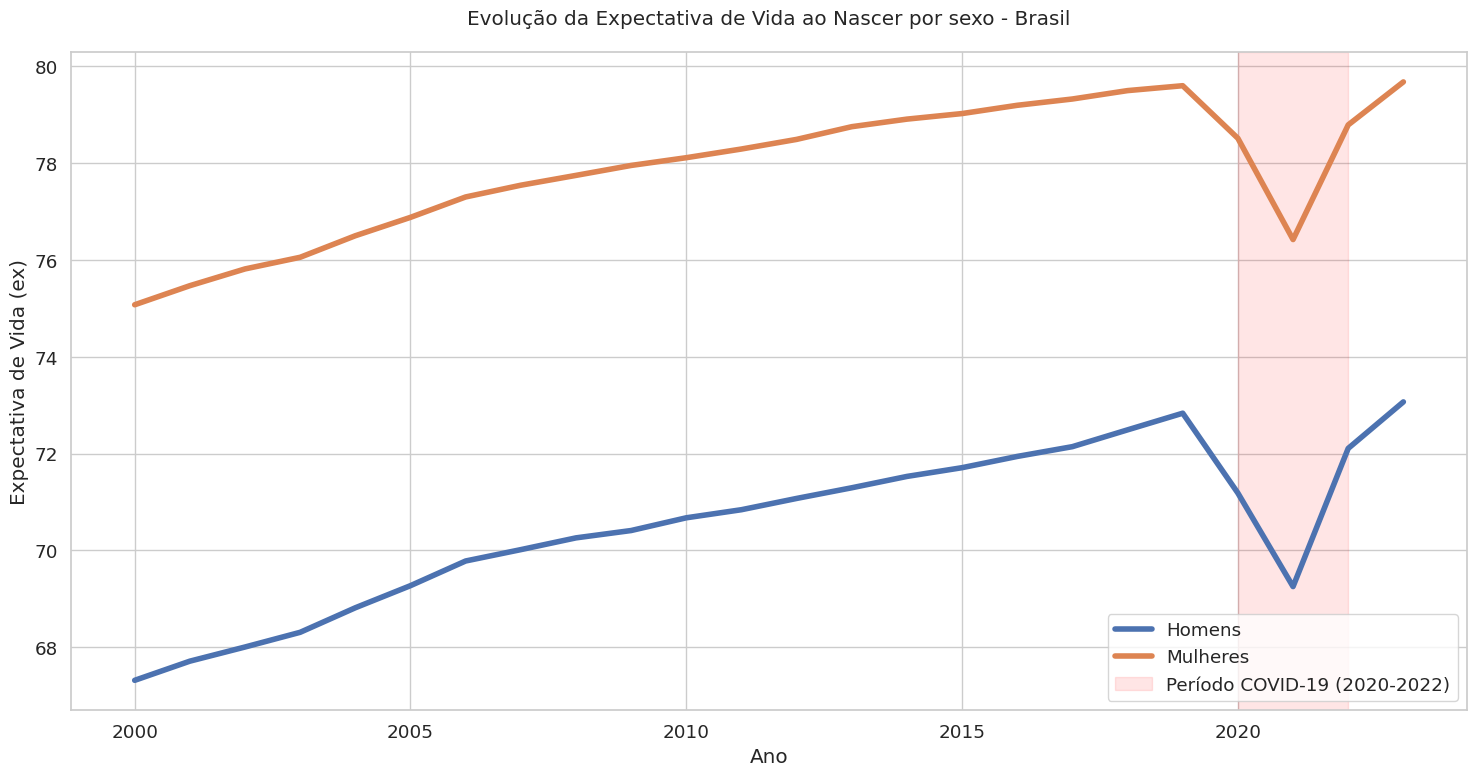

In [9]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Filtrar apenas o Grupo Etário 0 para ambas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_fem_br_0 = tabua_fem_br[tabua_fem_br['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer para Homens e Mulheres
plt.figure(figsize=(15, 8))

# Plota as linhas de expectativa de vida
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=4, label='Homens')
sns.lineplot(x='Ano', y='ex', data=tabua_fem_br_0, linewidth=4, label='Mulheres')

# Destaca o período da pandemia (2020-2022) com um degradê
plt.axvspan(2020, 2022, color='red', alpha=0.1, label='Período COVID-19 (2020-2022)')

plt.title('Evolução da Expectativa de Vida ao Nascer por sexo - Brasil', pad=20)
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")

plt.legend(loc='lower right')  # Posiciona a legenda
plt.tight_layout()
plt.show()

## 6.8 Comparação da Expectativa de Vida entre Regiões

A expectativa de vida varia significativamente entre países, regiões e estados em razão de diferenças socioeconômicas, sistemas de saúde, entre outros fatores.

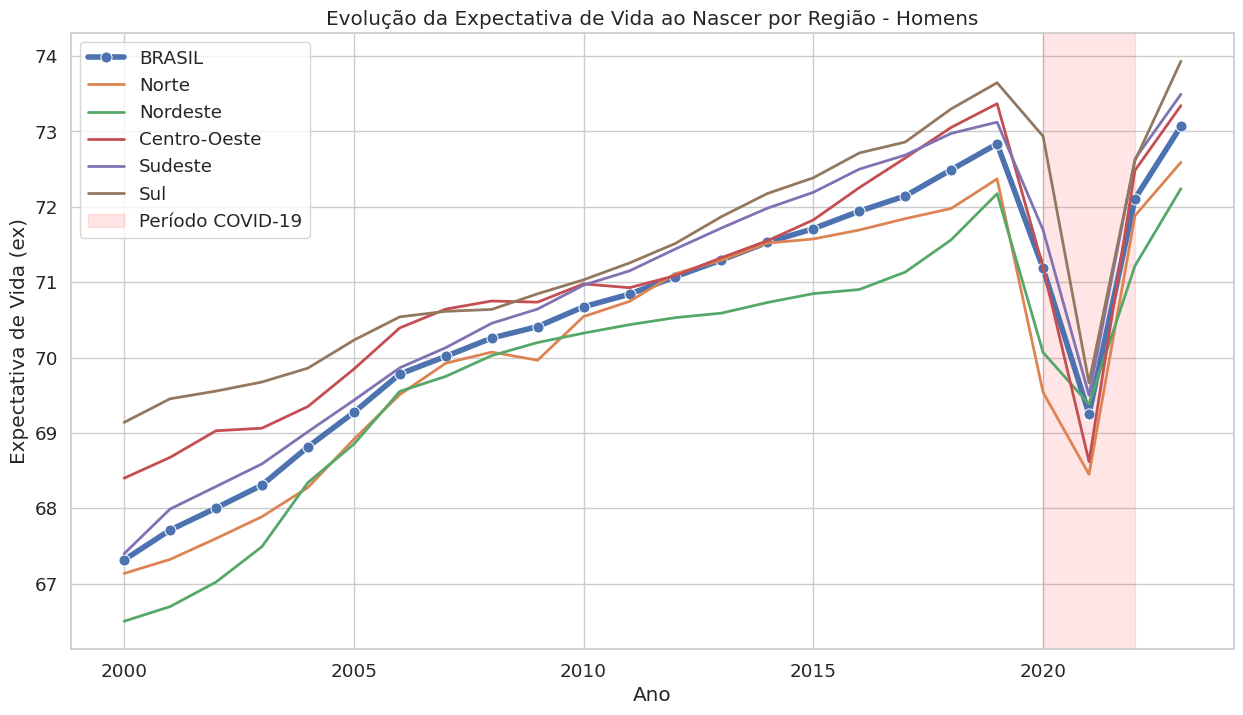

In [10]:
# Filtrar as regiões para a tábua masculina
tabua_mas_reg = tabua_mas[tabua_mas['Local'].isin(['Brasil', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste', 'Norte'])]

# Isolar a tábua de cada região
tabua_mas_br = tabua_mas_reg[tabua_mas_reg['Local'] == 'Brasil']
tabua_mas_no = tabua_mas_reg[tabua_mas_reg['Local'] == 'Norte']
tabua_mas_ne = tabua_mas_reg[tabua_mas_reg['Local'] == 'Nordeste']
tabua_mas_co = tabua_mas_reg[tabua_mas_reg['Local'] == 'Centro-Oeste']
tabua_mas_se = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sudeste']
tabua_mas_su = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sul']

# Filtrar o Grupo Etário 0 para todas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_mas_no_0 = tabua_mas_no[tabua_mas_no['Grupo Etário'] == '0']
tabua_mas_ne_0 = tabua_mas_ne[tabua_mas_ne['Grupo Etário'] == '0']
tabua_mas_co_0 = tabua_mas_co[tabua_mas_co['Grupo Etário'] == '0']
tabua_mas_se_0 = tabua_mas_se[tabua_mas_se['Grupo Etário'] == '0']
tabua_mas_su_0 = tabua_mas_su[tabua_mas_su['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer de Homens por Região
plt.figure(figsize=(15, 8))
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=4, label='BRASIL', marker='o', markersize=8)
sns.lineplot(x='Ano', y='ex', data=tabua_mas_no_0, linewidth=2, label='Norte')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_ne_0, linewidth=2, label='Nordeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_co_0, linewidth=2, label='Centro-Oeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_se_0, linewidth=2, label='Sudeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_su_0, linewidth=2, label='Sul')
plt.axvspan(2020, 2022, color='red', alpha=0.1, label='Período COVID-19')
plt.title('Evolução da Expectativa de Vida ao Nascer por Região - Homens')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

## 6.9 Mortalidade Infantil

A mortalidade infantil representa um importante indicador da saúde pública e do desenvolvimento socioeconômico de um país, sendo expressa como o número de óbitos de crianças menores de 1 ano ocorridos a cada 1.000 nascidos vivos.

Fórmula de Cálculo:

$$ Taxa = \frac{\text{Óbitos menores de um ano}}{\text{Nascidos Vivos}} \times 1.000 $$

Utilizaremos as informações oficiais disponibilizadas pelo Ministério da Saúde - DataSUS, que consolidam:

- Óbitos infantis do Sistema de Informação sobre Mortalidade (SIM)

- Nascidos vivos do Sistema de Informações sobre Nascidos Vivos (Sinasc)

In [11]:
# Carregar Base de Dados de Mortalidade Infantil - municípios e regiões
mort_inf_mun = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/taxas_mortal_inf_mun.parquet")
mort_inf_reg = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/taxas_mortal_inf_brreuf.parquet")

# Visualizar 10 primeiras linhas do banco de dados municipal
print("Mortalidade Infantil - Municípios")
mort_inf_mun.head(10)

Mortalidade Infantil - Municípios


,Localidade,Código IBGE,Código DataSUS,Ano,Taxa
0,Município Ignorado -RO,1100000,110000,1990,NaN
1,Município Ignorado -RO,1100000,110000,1991,NaN
2,Município Ignorado -RO,1100000,110000,1992,NaN
3,Município Ignorado -RO,1100000,110000,1993,NaN
4,Município Ignorado -RO,1100000,110000,1994,NaN
5,Município Ignorado -RO,1100000,110000,1995,NaN
6,Município Ignorado -RO,1100000,110000,1996,900.00
7,Município Ignorado -RO,1100000,110000,1997,1000.00
8,Município Ignorado -RO,1100000,110000,1998,2448.28
9,Município Ignorado -RO,1100000,110000,1999,274.13


In [12]:
# Visalizar as 10 primeiras linhas do banco de dados regiões
print("Mortalidade Infantil - Regiões")
mort_inf_reg.head(10)

Mortalidade Infantil - Regiões


,Localidade,Código IBGE,Código DataSUS,Ano,Taxa
0,Brasil,0,0,1990,47.10
1,Brasil,0,0,1991,44.39
2,Brasil,0,0,1992,41.85
3,Brasil,0,0,1993,39.45
4,Brasil,0,0,1994,37.20
5,Brasil,0,0,1995,35.07
6,Brasil,0,0,1996,33.06
7,Brasil,0,0,1997,31.17
8,Brasil,0,0,1998,29.38
9,Brasil,0,0,1999,27.70


## 6.10 Comparação da Mortalidade Infatil entre Regiões

A mortalidade infantil varia significativamente entre diferentes municípios e regiões. Vamos visualizar essas diferenças:

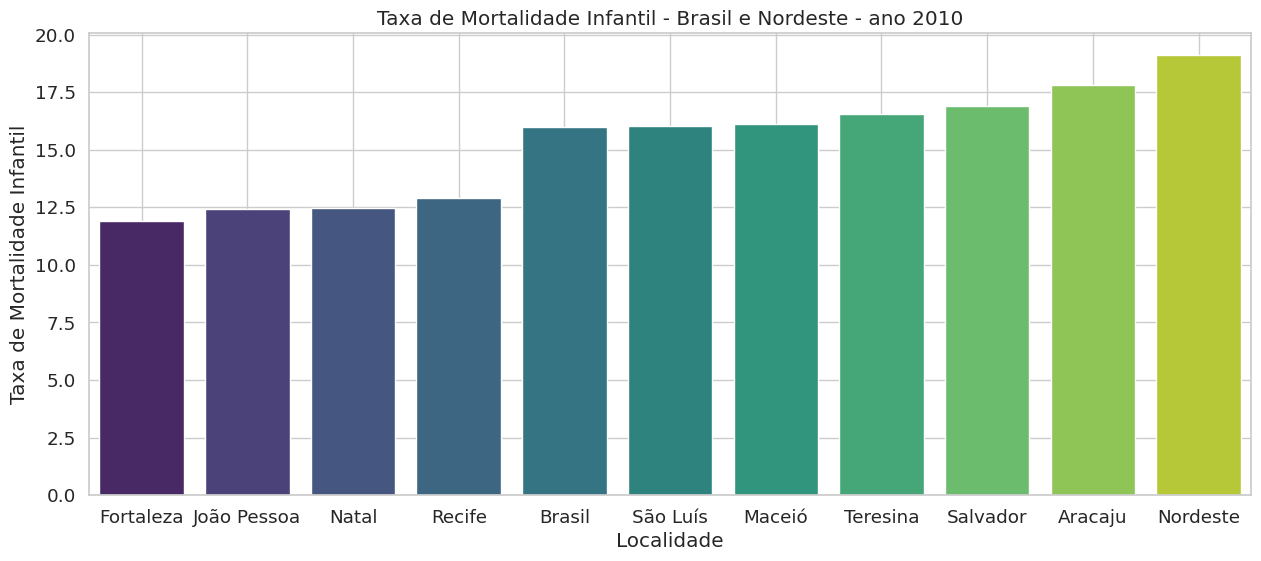

In [13]:
# Filtrar apenas as capitais nordestinas da base municipal
mort_inf_mun_cap = mort_inf_mun[mort_inf_mun['Localidade'].isin(['Salvador', 'Maceió', 'Aracaju', 'Recife', 'João Pessoa',
                                                    'Natal', 'Fortaleza', 'Teresina', 'São Luís'])]

# Filtrar Brasil e Nordeste da base regiões
mort_inf_reg_br = mort_inf_reg[mort_inf_reg['Localidade'].isin(['Brasil', 'Nordeste'])]

# Juntar as duas novas bases
mort_inf_br_ne = pd.concat([mort_inf_mun_cap, mort_inf_reg_br])

# Filtrar apenas o ano de 2010
mort_inf_br_ne_2010 = mort_inf_br_ne[mort_inf_br_ne['Ano'] == 2010]

# Gráfico em barras da Taxa de Mortalidade Infantil do ano de 2010 ordenada e escala de cores
plt.figure(figsize=(15, 6))
sns.barplot(x='Localidade', y='Taxa', data=mort_inf_br_ne_2010.sort_values(by='Taxa'), hue='Localidade', palette="viridis", legend=False)
plt.title('Taxa de Mortalidade Infantil - Brasil e Nordeste - ano 2010')
plt.xlabel('Localidade')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.grid(True, which="major", ls="-")
plt.show()

## 6.11 Comportamento das Taxas de Mortalidade

Desde 2000, as taxas de mortalidade infantil vêm caindo de forma consistente, refletindo avanços em saúde pública, saneamento e acesso a serviços essenciais, como mostra o gráfico a seguir.

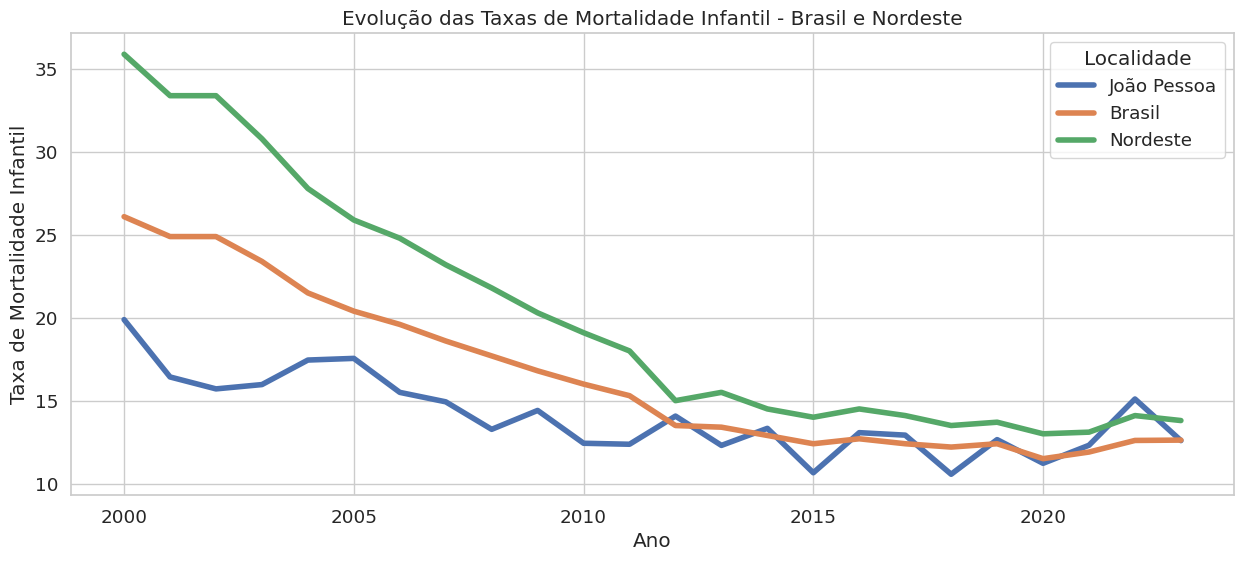

In [14]:
# Filtrar a base de dados a partir do ano 2000
mort_inf_br_ne_2000 = mort_inf_br_ne[mort_inf_br_ne['Ano'] >= 2000]

# Filtrar apenas Brasil, Nordeste e João Pessoa
mort_inf_br_ne_2000 = mort_inf_br_ne_2000[mort_inf_br_ne_2000['Localidade'].isin(['Brasil', 'Nordeste', 'João Pessoa'])]

# Gráfico de Evolução das Taxas de Mortalidade Infantil comparativa das capitais nordestinas
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='Taxa', hue='Localidade', data=mort_inf_br_ne_2000, linewidth=4)
plt.title('Evolução das Taxas de Mortalidade Infantil - Brasil e Nordeste')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.grid(True, which="major", ls="-")
plt.legend(title='Localidade')
plt.show()

## 6.12 Pirâmides Etárias

As pirâmides etárias são fundamentais para compreender a estrutura da população, quando comparada ao longo do tempo podem revelar tendências de envelhecimento, fecundidade e expectativa de vida.

Utilizamores as Projeções Populacionais disponibilizadas pelo IBGE. Disponível em https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=publicacoes.

In [15]:
# Carregar base de dados populacionais
pop_bra = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/populacao_completa.parquet")

# Visualizar primeiras linhas da base de dados
pop_bra.head(19)

,Local,Ano,Grupo Etário,Homens,Mulheres,Ambos
0,Brasil,2000,00-04,8739233,8542314,17281547
1,Brasil,2000,05-09,8710340,8668650,17378990
2,Brasil,2000,10-14,8800488,8798890,17599378
3,Brasil,2000,15-19,8880452,8950892,17831344
4,Brasil,2000,20-24,8118846,8283382,16402228
5,Brasil,2000,25-29,7067716,7284148,14351864
6,Brasil,2000,30-34,6565143,6857096,13422239
7,Brasil,2000,35-39,6065904,6400789,12466693
8,Brasil,2000,40-44,5273405,5563053,10836458
9,Brasil,2000,45-49,4381441,4632276,9013717


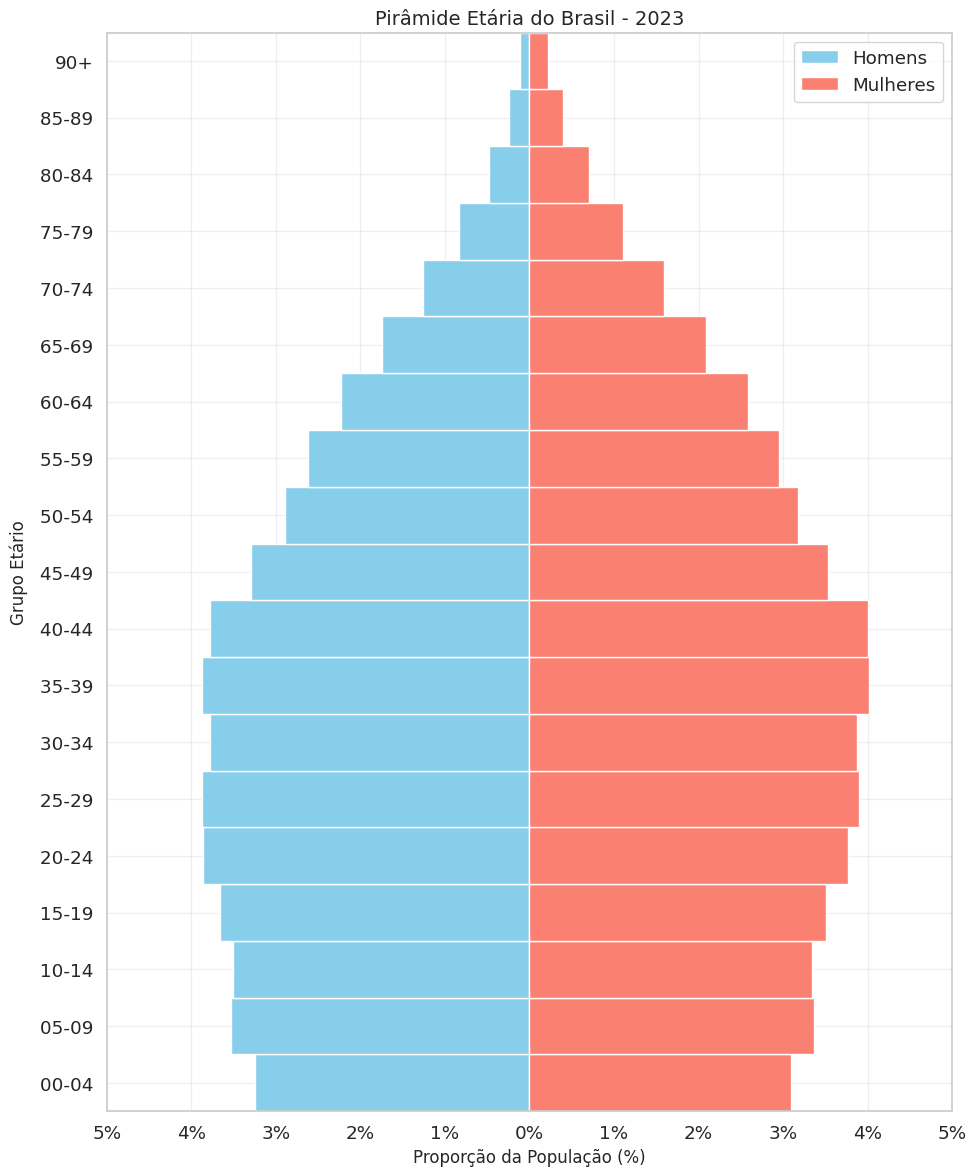

In [16]:
# Filtrar apenas o Local Brasil e o ano de 2023
pop_bra_2023 = pop_bra[(pop_bra['Local'] == 'Brasil') & (pop_bra['Ano'] == 2023)].copy()

# Calcular as proporções dos grupos etários de cada sexo
populacao_total = pop_bra_2023['Ambos'].sum()
pop_bra_2023['Homens_%'] = (pop_bra_2023['Homens'] / populacao_total) * 100
pop_bra_2023['Mulheres_%'] = (pop_bra_2023['Mulheres'] / populacao_total) * 100

# Configurar o gráfico
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")

# Definir a altura das barras (quanto maior, menos espaço entre elas)
bar_height = 1

# Barras para homens (lado esquerdo, negativo)
plt.barh(
    pop_bra_2023['Grupo Etário'],
    -pop_bra_2023['Homens_%'],
    height=bar_height,  # Controle do espaçamento
    color='skyblue',
    label='Homens'
)

# Barras para mulheres (lado direito, positivo)
plt.barh(
    pop_bra_2023['Grupo Etário'],
    pop_bra_2023['Mulheres_%'],
    height=bar_height,  # Mesmo valor para manter consistência
    color='salmon',
    label='Mulheres'
)

# Ajustes estéticos (mantidos do original)
plt.title('Pirâmide Etária do Brasil - 2023', fontsize=14)
plt.xlabel('Proporção da População (%)', fontsize=12)
plt.ylabel('Grupo Etário', fontsize=12)
y_positions = np.arange(len(pop_bra_2023['Grupo Etário']))
plt.ylim(y_positions[0] - 0.5, y_positions[-1] + 0.5)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
           ['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%', '3%', '4%', '5%'])
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()  # Melhora o ajuste geral
plt.show()

### 6.12.1 Pirâmides Etárias comparadas

As pirâmides etárias comparativas permitem visualizar mudanças demográficas entre diferentes períodos ou regiões, facilitando a análise de transições populacionais, como o envelhecimento ou a queda na natalidade, evidenciadas nos gráficos a seguir.

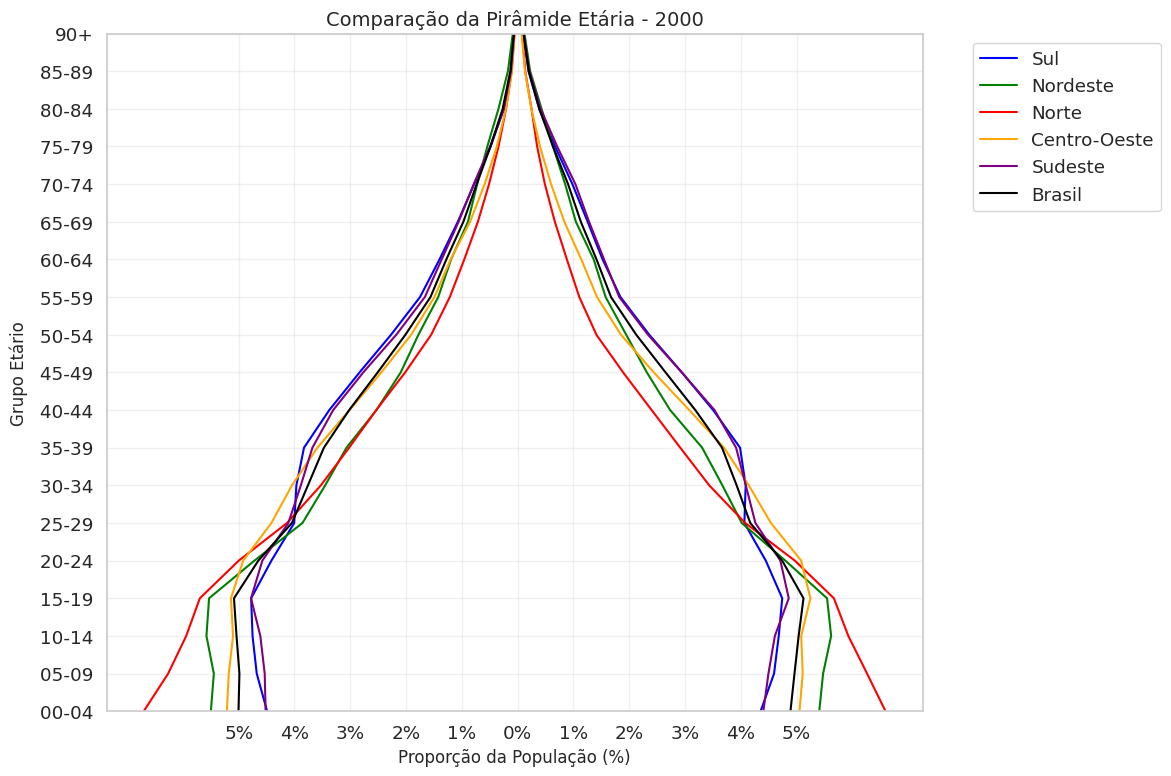

In [28]:
# Filtrar Local Sul, Nordeste, Norte, Centro-Oeste e Sudeste
pop_br_ne_pb = pop_bra[(pop_bra['Local'].isin(['Sul', 'Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Brasil']))]

# Filtrar o ano de 2000
pop_br_ne_pb = pop_br_ne_pb[pop_br_ne_pb['Ano'] == 2000]

# Calcular proporções em relação à população total de cada local
for local in ['Sul', 'Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Brasil']:
    df_local = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    total_local = df_local['Ambos'].sum()
    pop_br_ne_pb.loc[pop_br_ne_pb['Local'] == local, 'Homens_%'] = (df_local['Homens'] / total_local) * 100
    pop_br_ne_pb.loc[pop_br_ne_pb['Local'] == local, 'Mulheres_%'] = (df_local['Mulheres'] / total_local) * 100

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Cores para cada região
cores = {
    'Sul': 'blue',
    'Nordeste': 'green',
    'Norte': 'red',
    'Centro-Oeste': 'orange',
    'Sudeste': 'purple',
    'Brasil': 'black'
}

# Plotar linhas para Homens (valores negativos)
for local in ['Sul', 'Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Brasil']:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    plt.plot(
        -df_plot['Homens_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[local],
        label=local
            )

# Plotar linhas para Mulheres (valores positivos)
for local in ['Sul', 'Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Brasil']:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    plt.plot(
        df_plot['Mulheres_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[local]
                    )

# Ajustes estéticos
plt.title('Comparação da Pirâmide Etária - 2000', fontsize=14)
plt.xlabel('Proporção da População (%)', fontsize=12)
plt.ylabel('Grupo Etário', fontsize=12)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
           ['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%', '3%', '4%', '5%'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-0, len(pop_br_ne_pb['Grupo Etário'].unique()) - 1)
plt.tight_layout()
plt.show()

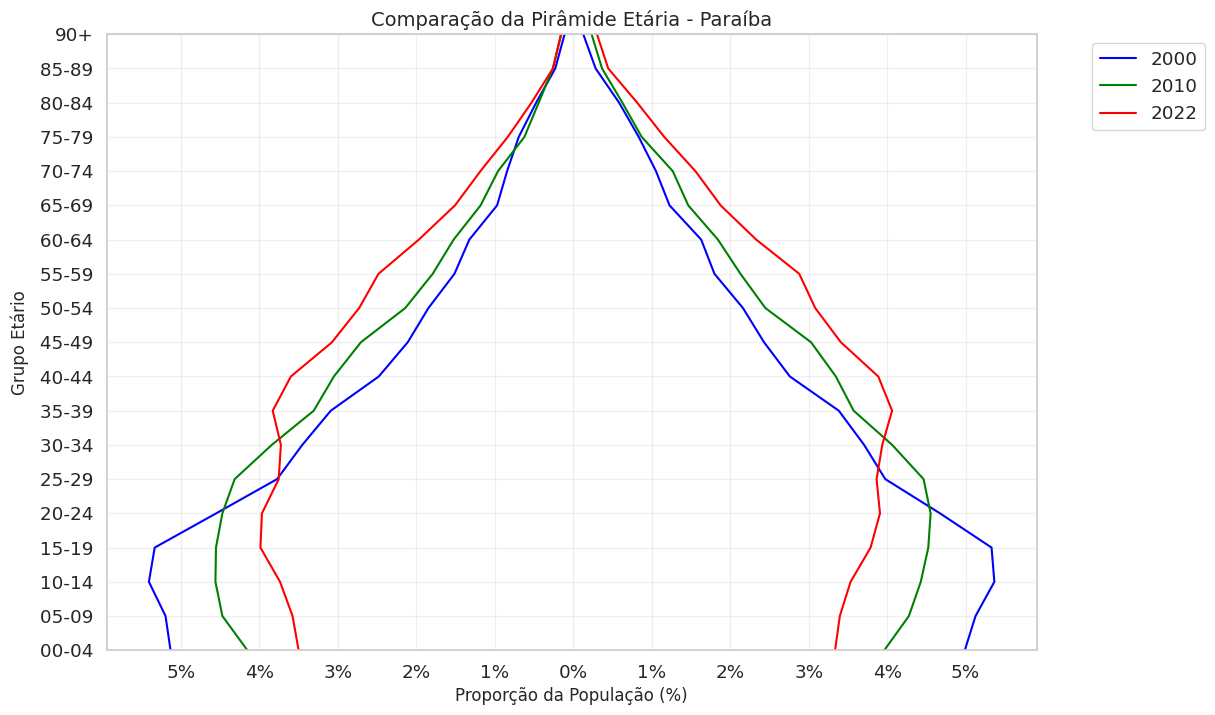

In [27]:
# Filtrar o Local Paraíba
pop_br_ne_pb = pop_bra[(pop_bra['Local'] == 'Paraíba')]

# Filtrar os anos de censo (2000, 2010 e 2022)
pop_br_ne_pb = pop_br_ne_pb[pop_br_ne_pb['Ano'].isin([2000, 2010, 2022])]

# Calcular as proporções em relação à população total em cada ano selecionado
for ano in [2000, 2010, 2022]:
    df_ano = pop_br_ne_pb[pop_br_ne_pb['Ano'] == ano]
    total_pop = df_ano['Ambos'].sum()
    pop_br_ne_pb.loc[pop_br_ne_pb['Ano'] == ano, 'Homens_%'] = (df_ano['Homens'] / total_pop) * 100
    pop_br_ne_pb.loc[pop_br_ne_pb['Ano'] == ano, 'Mulheres_%'] = (df_ano['Mulheres'] / total_pop) * 100

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Cores para cada ano
cores = {
    2000: 'blue',
    2010: 'green',
    2022: 'red'
}

# Plotar linhas para Homens (valores negativos)
for ano in [2000, 2010, 2022]:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Ano'] == ano]
    plt.plot(
        -df_plot['Homens_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[ano],
        label=ano
            )

# Plotar linhas para Mulheres (valores positivos)
for ano in [2000, 2010, 2022]:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Ano'] == ano]
    plt.plot(
        df_plot['Mulheres_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[ano]
                    )

# Ajustes estéticos
plt.title('Comparação da Pirâmide Etária - Paraíba', fontsize=14)
plt.xlabel('Proporção da População (%)', fontsize=12)
plt.ylabel('Grupo Etário', fontsize=12)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
           ['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%', '3%', '4%', '5%'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, len(pop_br_ne_pb['Grupo Etário'].unique()) - 1)
plt.grid(True, alpha=0.3)

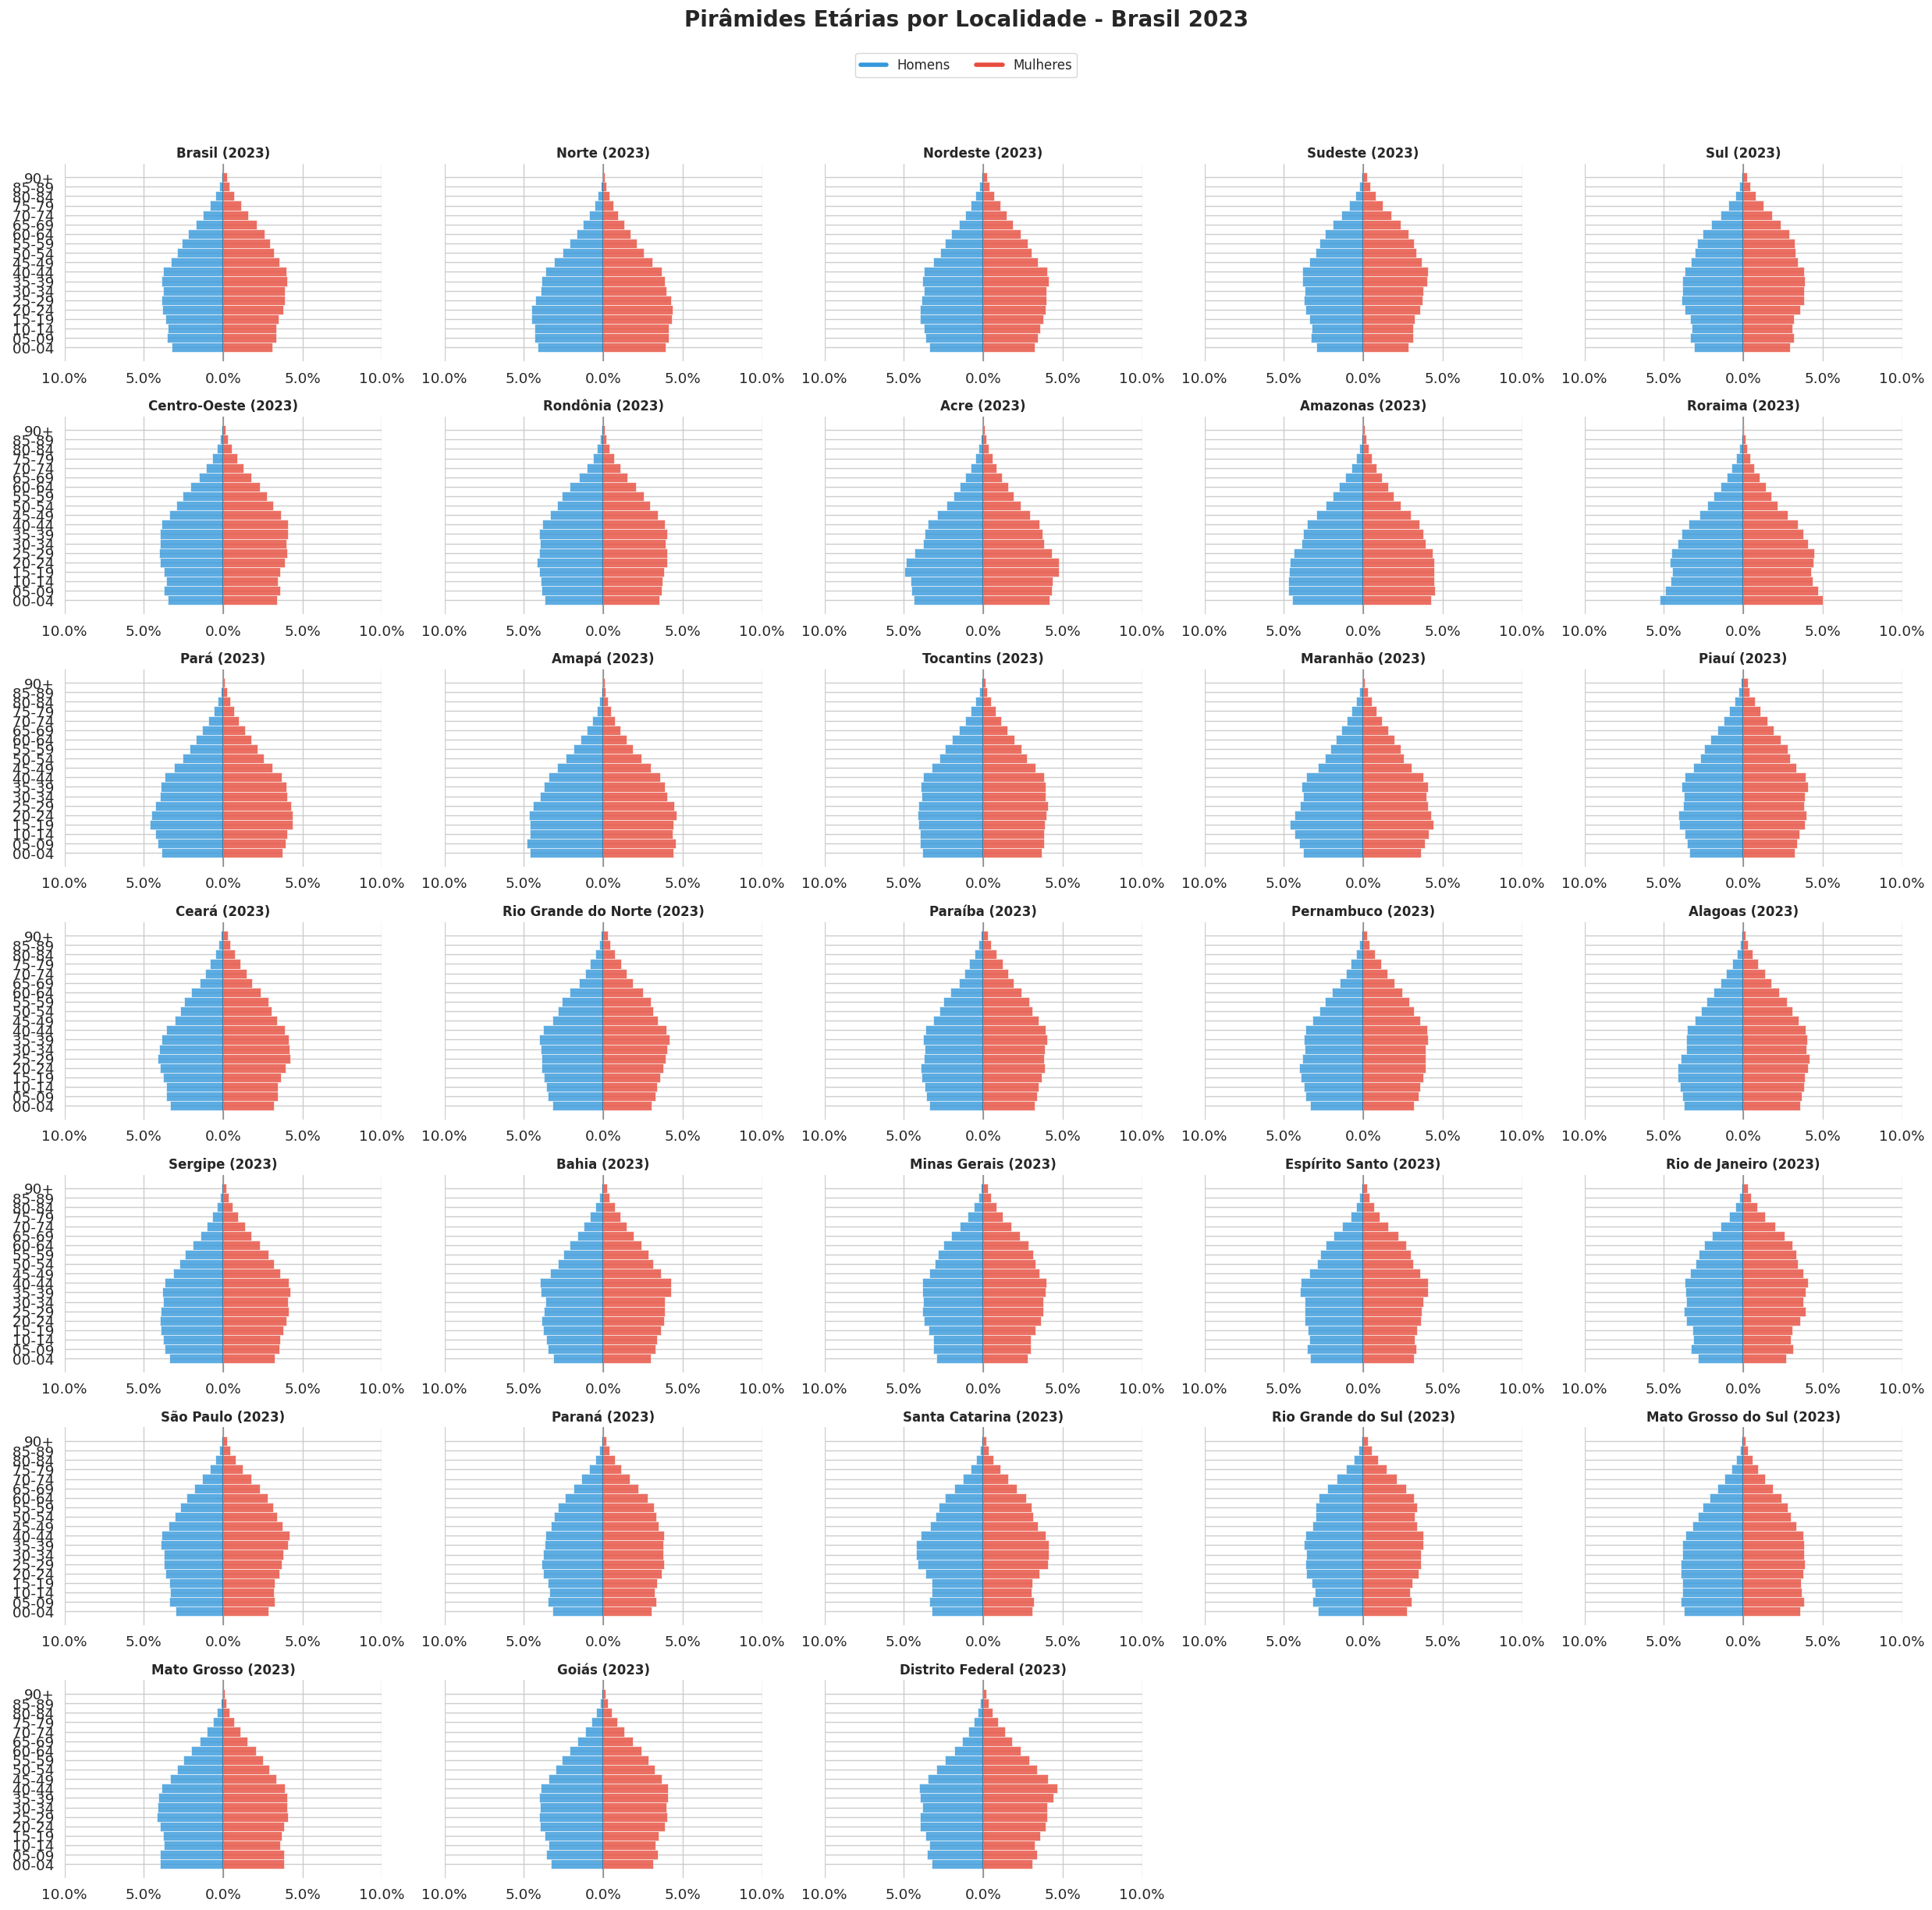

In [29]:
# Lista de locais únicos
locais = pop_bra['Local'].unique()

# Configurações gerais - estilo mais moderno
sns.set_style("whitegrid")
fig = plt.figure(figsize=(25, 25))

# Cores mais suaves e agradáveis
cor_homens = '#3498db'  # Azul mais vibrante
cor_mulheres = '#e74c3c'  # Vermelho mais vibrante

# Criando uma legenda única fora dos subplots
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=cor_homens, lw=4, label='Homens'),
    Line2D([0], [0], color=cor_mulheres, lw=4, label='Mulheres')
]

# Loop através dos locais para criar as pirâmides
for i, local in enumerate(locais, 1):
    ax = plt.subplot((len(locais) // 5) + 1, 5, i)

    # Filtrar dados para o local e ano 2023
    dados_local = pop_bra[(pop_bra['Local'] == local) & (pop_bra['Ano'] == 2023)].copy()

    # Calcular proporções (usando .loc para evitar o warning)
    populacao_total = dados_local['Ambos'].sum()
    dados_local.loc[:, 'Homens_%'] = (dados_local['Homens'] / populacao_total) * 100
    dados_local.loc[:, 'Mulheres_%'] = (dados_local['Mulheres'] / populacao_total) * 100

    # Barras para homens (lado esquerdo, negativo)
    barras_homens = ax.barh(
        dados_local['Grupo Etário'],
        -dados_local['Homens_%'],
        height=1,
        color=cor_homens,
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )

    # Barras para mulheres (lado direito, positivo)
    barras_mulheres = ax.barh(
        dados_local['Grupo Etário'],
        dados_local['Mulheres_%'],
        height=1,
        color=cor_mulheres,
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )

    # Ajustes estéticos
    ax.set_title(f'{local} (2023)', fontsize=12, fontweight='bold')

    # Remover rótulos de eixos individuais para deixar mais limpo
    ax.set_xlabel('')

    # Formatar os ticks do eixo x
    max_val = max(dados_local[['Homens_%', 'Mulheres_%']].max().max() * 1.1, 10)
    x_ticks = [-max_val, -max_val/2, 0, max_val/2, max_val]
    x_labels = [f'{abs(x):.1f}%' for x in x_ticks]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)

    # Adicionar linha central
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

    # Remover linhas de borda
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remover legendas individuais
    if ax.get_legend():
        ax.get_legend().remove()

    # Mostrar rótulos do eixo y apenas nos gráficos da primeira coluna (i % 5 == 1)
    if i % 5 != 1:
        ax.set_yticklabels([])

# Adicionando título geral e legenda única
plt.suptitle('Pirâmides Etárias por Localidade - Brasil 2023',
             fontsize=20, fontweight='bold', y=0.98)

# Adicionar legenda única na parte superior
fig.legend(handles=legend_elements, loc='upper center',
           bbox_to_anchor=(0.5, 0.96), ncol=2, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar espaço para título e legenda
plt.show()

## 6.13 Conclusão

Neste capítulo, exploramos como o Seaborn pode ser usado para visualizar dados demográficos, com foco em tábuas de mortalidade, expectativa de vida, mortalidade infantil e pirâmides etárias. Essas visualizações auxiliam a compreensão da dinâmica populacional e podem ser úteis para o planejamento de políticas públicas.